In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving House_Price.csv to House_Price (1).csv


{'House_Price.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,

# New section

In [ ]:
df = pd.read_csv("House_Price.csv")
df.head(3)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  

[3 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.shape

(7109, 22)

In [ ]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
s = df.isnull()

<Axes: >

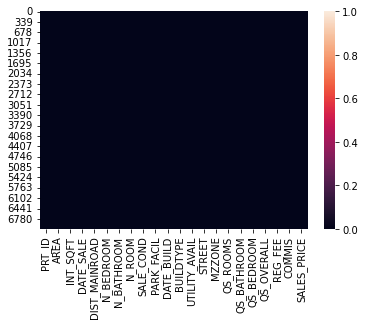

In [ ]:
sns.heatmap(s)

In [ ]:
# lets see the unique values of columns
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [ ]:
# Cleaning the Data 
df.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df.AREA.replace('Karapakkam','Karapakam',inplace=True)
df.AREA.replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df.AREA.replace('KKNagar','KK Nagar',inplace=True)
df.AREA.replace('TNagar','T Nagar',inplace=True)
df.AREA.replace('Adyr','Adyar',inplace=True)
df.AREA.replace('Velchery','Velachery',inplace=True)
df.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
df.BUILDTYPE.replace('Other','Others',inplace=True)
df.UTILITY_AVAIL.replace('AllPub','All Pub',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr ','NoSeWa',inplace=True)
df.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
df.SALE_COND.replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df.SALE_COND.replace('Adj Land','AdjLand',inplace=True)
df.PARK_FACIL.replace('Noo','No',inplace=True)
df.STREET.replace('Pavd','Paved',inplace=True)
df.STREET.replace('NoAccess','No Access',inplace=True)

<Axes: >

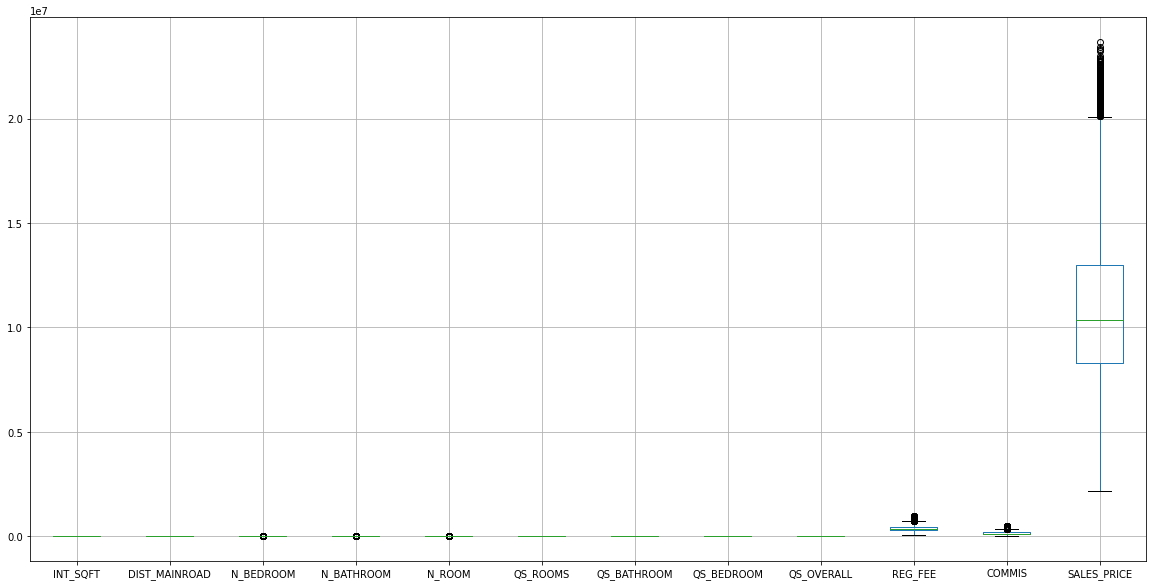

In [ ]:
# To Find Outlier
mlt.figure(figsize=(20,10))
df.boxplot()

In [ ]:
#EXPLORATORY DATA ANALYSIS

In [ ]:
#Univariate Analysis

array([[<Axes: title={'center': 'INT_SQFT'}>,
        <Axes: title={'center': 'DIST_MAINROAD'}>,
        <Axes: title={'center': 'N_BEDROOM'}>],
       [<Axes: title={'center': 'N_BATHROOM'}>,
        <Axes: title={'center': 'N_ROOM'}>,
        <Axes: title={'center': 'QS_ROOMS'}>],
       [<Axes: title={'center': 'QS_BATHROOM'}>,
        <Axes: title={'center': 'QS_BEDROOM'}>,
        <Axes: title={'center': 'QS_OVERALL'}>],
       [<Axes: title={'center': 'REG_FEE'}>,
        <Axes: title={'center': 'COMMIS'}>,
        <Axes: title={'center': 'SALES_PRICE'}>]], dtype=object)

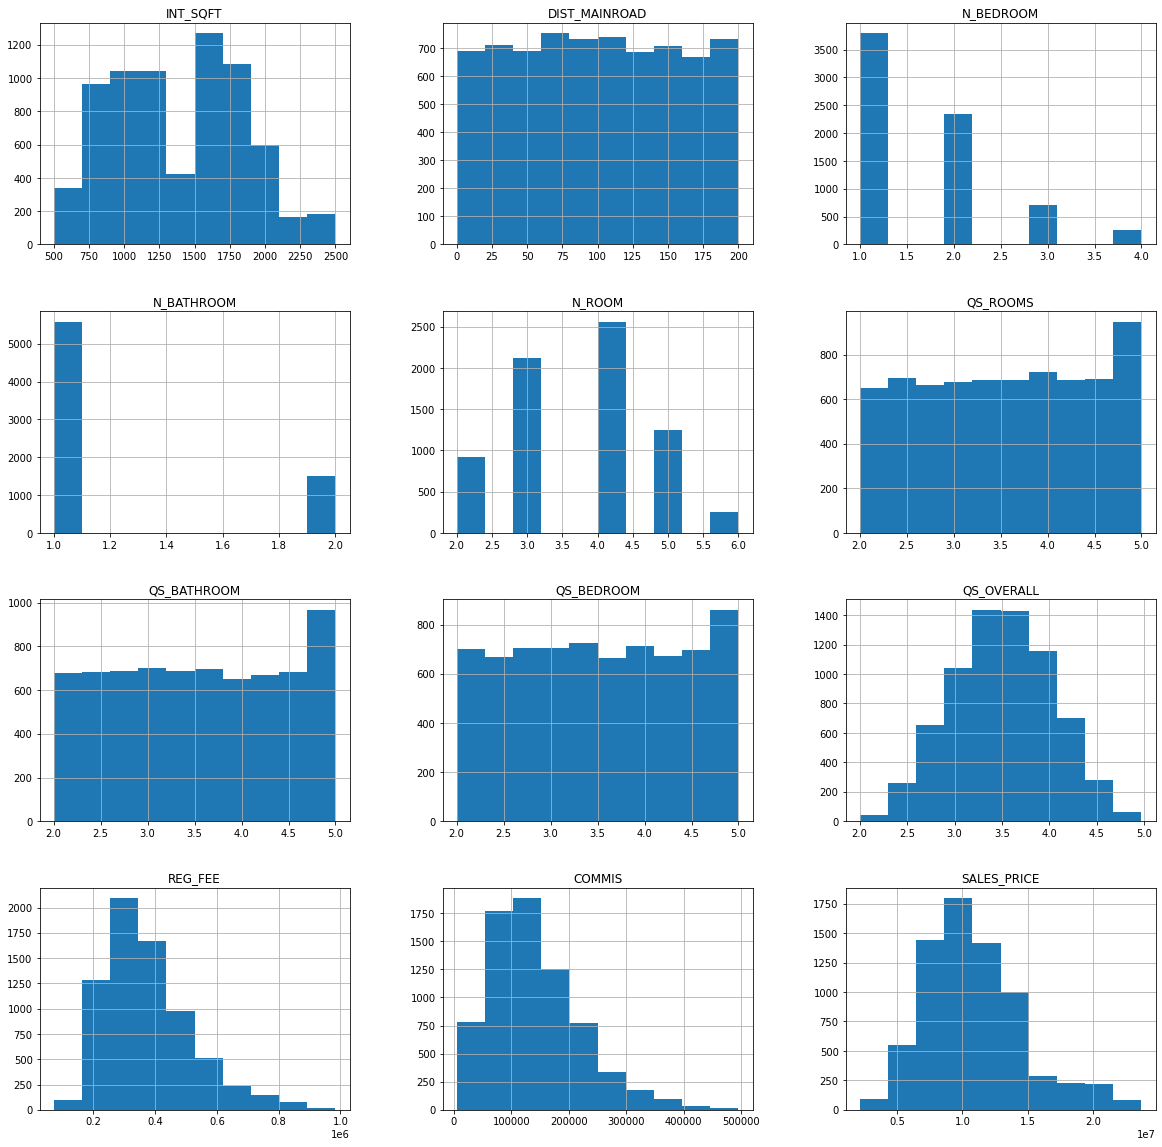

In [ ]:
sale = df.copy()
sale.hist(figsize=(20,20))

In [ ]:
# Bivariate Analysis

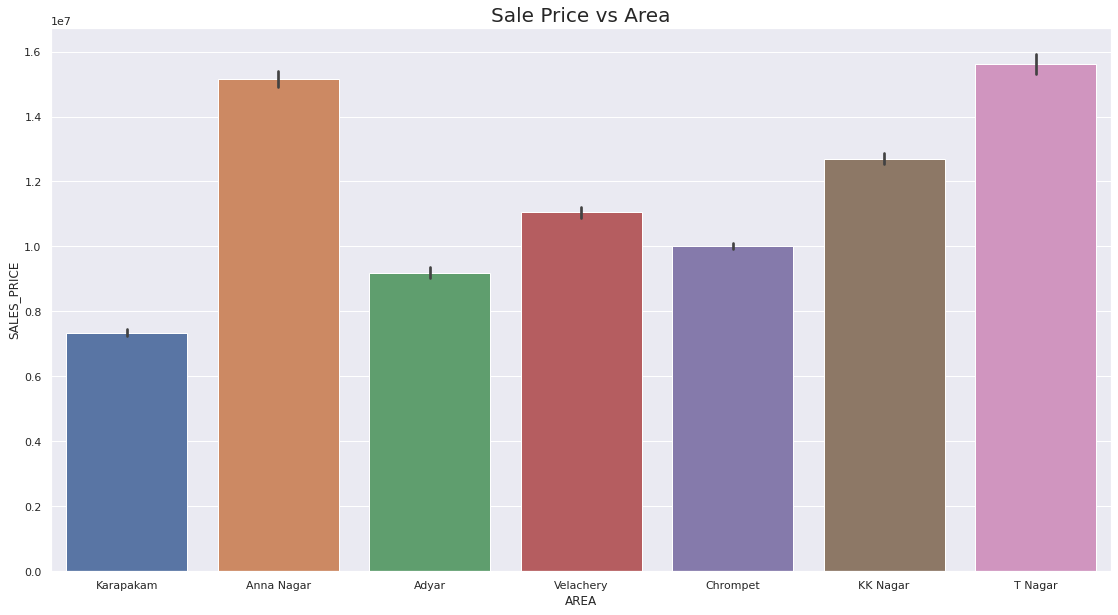

In [ ]:
# Salesprice VS Area

sns.set(rc = {'figure.figsize' : (19,10)})
sns.barplot(x= "AREA", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs Area', fontsize=20)
mlt.show()

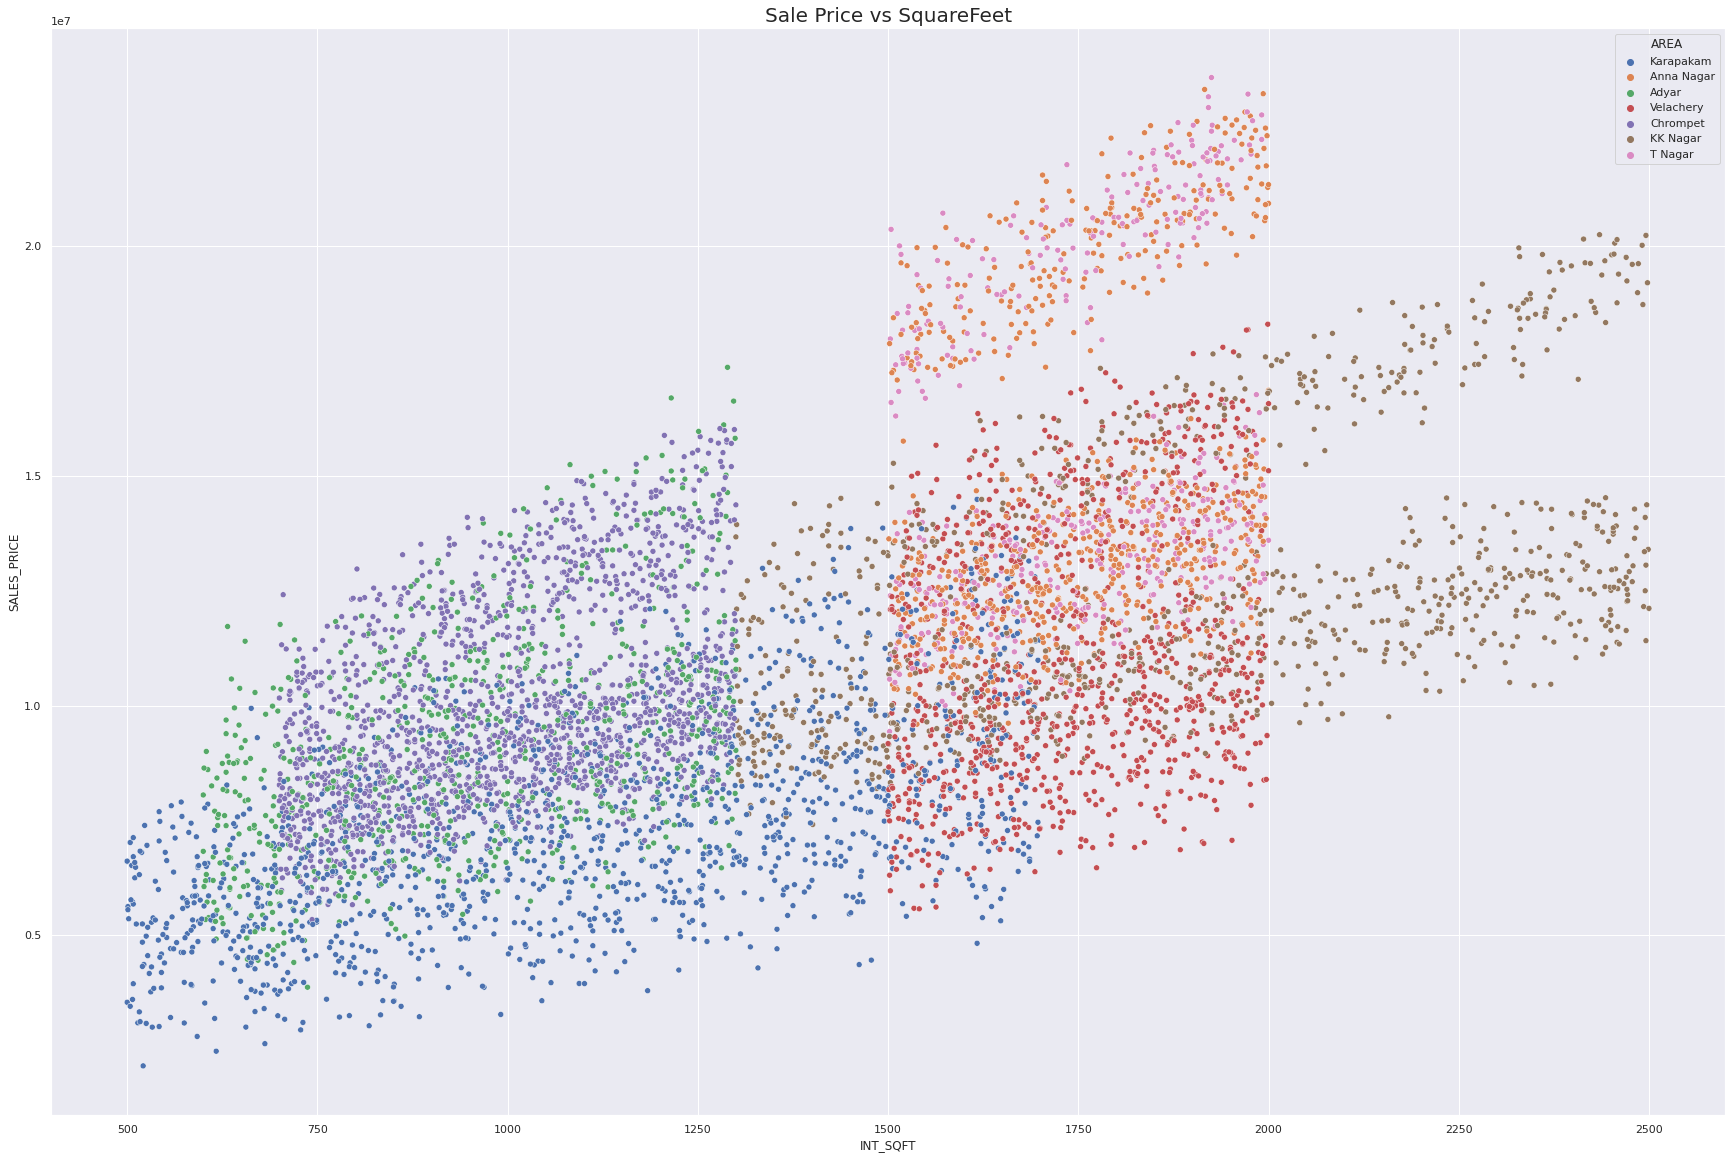

In [ ]:
# Salesprice VS SquareFeet

sns.set(rc = {'figure.figsize' : (30,20)})
sns.scatterplot(x= "INT_SQFT", y = "SALES_PRICE",hue="AREA", data = sale)
mlt.title('Sale Price vs SquareFeet', fontsize=20)
mlt.show()

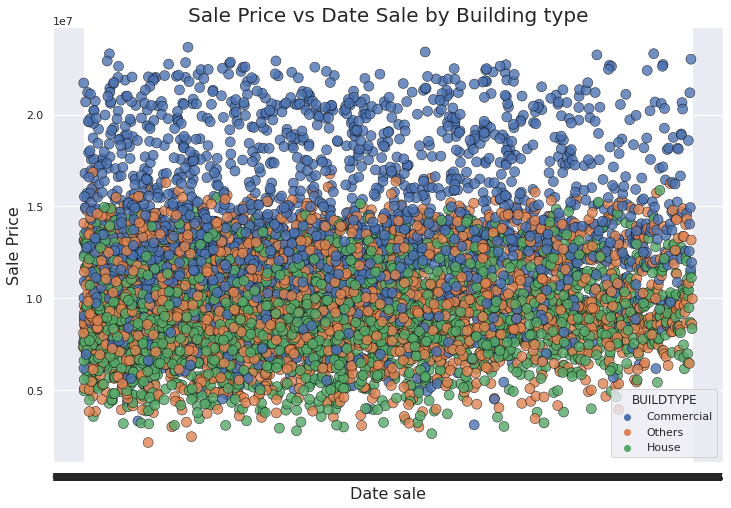

In [ ]:
# Salesprice VS DATE_SALE

sns.set(rc = {'figure.figsize' : (12,8)})
sns.scatterplot(x="DATE_SALE", y="SALES_PRICE", hue='BUILDTYPE', data=sale, s=100, alpha=0.8, edgecolor='black', linewidth=0.5)
mlt.xlabel('Date sale', fontsize=16)
mlt.ylabel('Sale Price', fontsize=16)
mlt.title('Sale Price vs Date Sale by Building type', fontsize=20)
mlt.show()

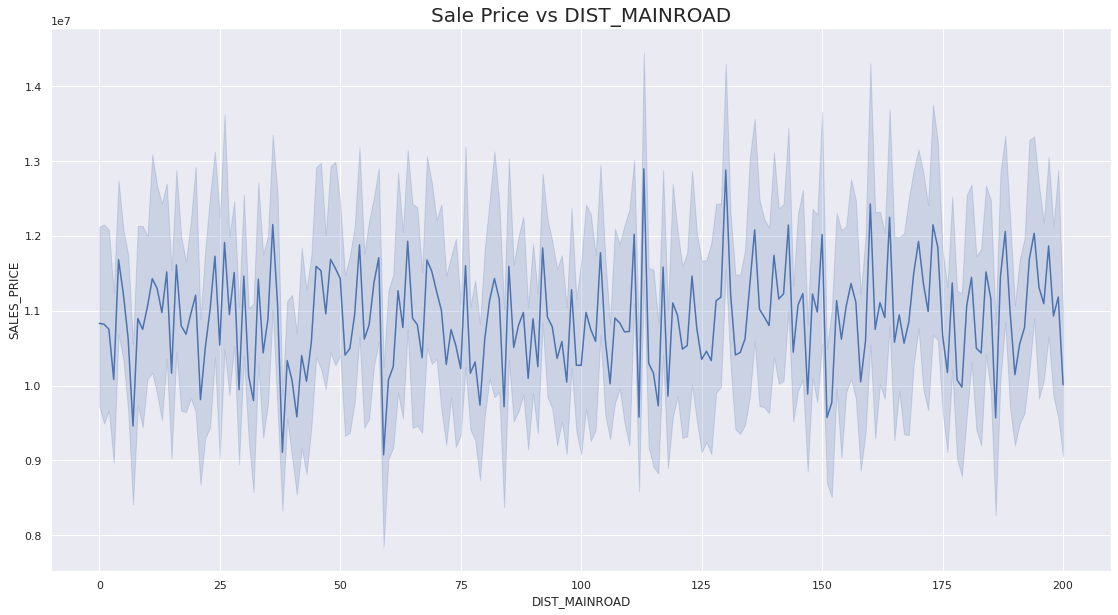

In [ ]:
# Salesprice VS DIST_MAINROAD

sns.set(rc = {'figure.figsize' : (19,10)})
sns.lineplot(x= "DIST_MAINROAD", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs DIST_MAINROAD', fontsize=20)
mlt.show()

In [ ]:
#N_BEDROOM VS SALE PRICE

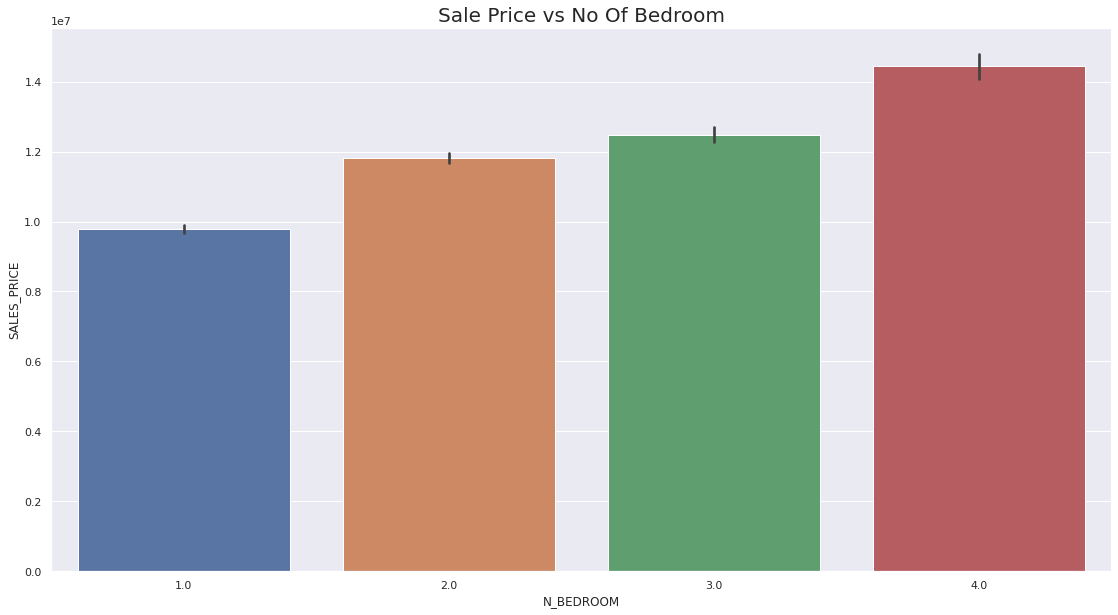

In [ ]:
sns.set(rc = {'figure.figsize' : (19,10)})
sns.barplot(x= "N_BEDROOM", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs No Of Bedroom', fontsize=20)
mlt.show()

In [ ]:
#N_BATHROOM vs SALES PRICE

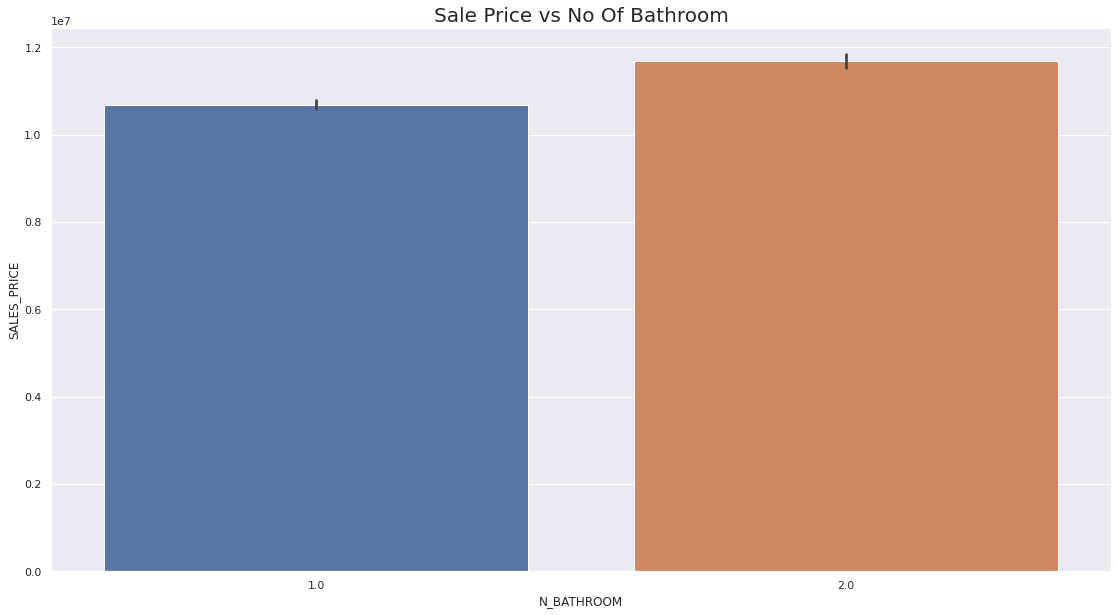

In [ ]:
sns.set(rc = {'figure.figsize' : (19,10)})
sns.barplot(x= "N_BATHROOM", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs No Of Bathroom', fontsize=20)
mlt.show()

In [ ]:
#N_ROOM Vs SALES PRICE


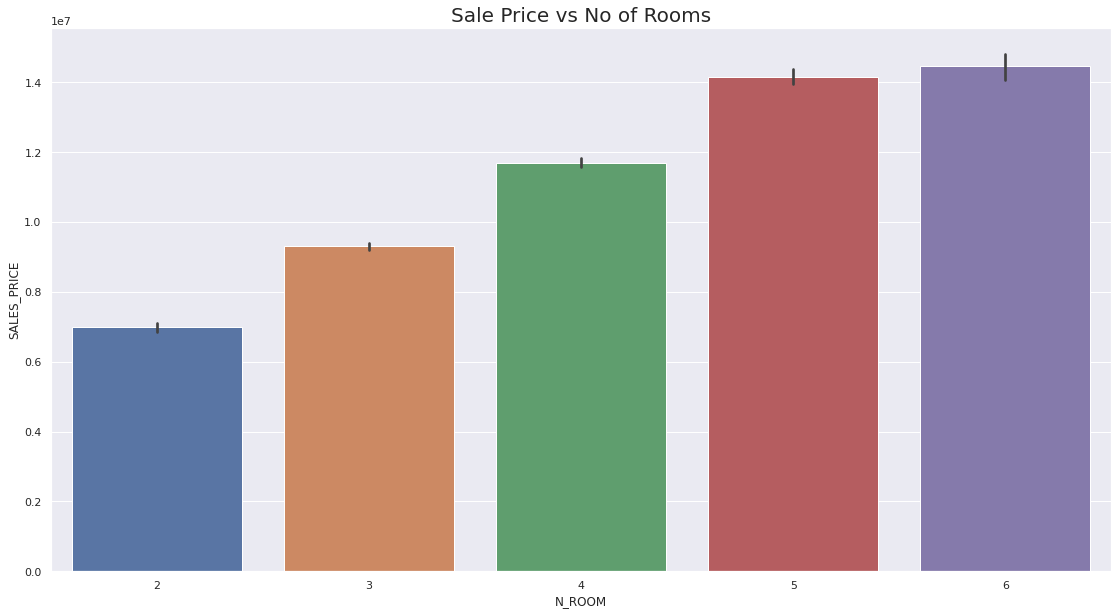

In [ ]:
sns.set(rc = {'figure.figsize' : (19,10)})
sns.barplot(x= "N_ROOM", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs No of Rooms', fontsize=20)
mlt.show()

In [ ]:
#SALE CONDITION VS SALE PRICE

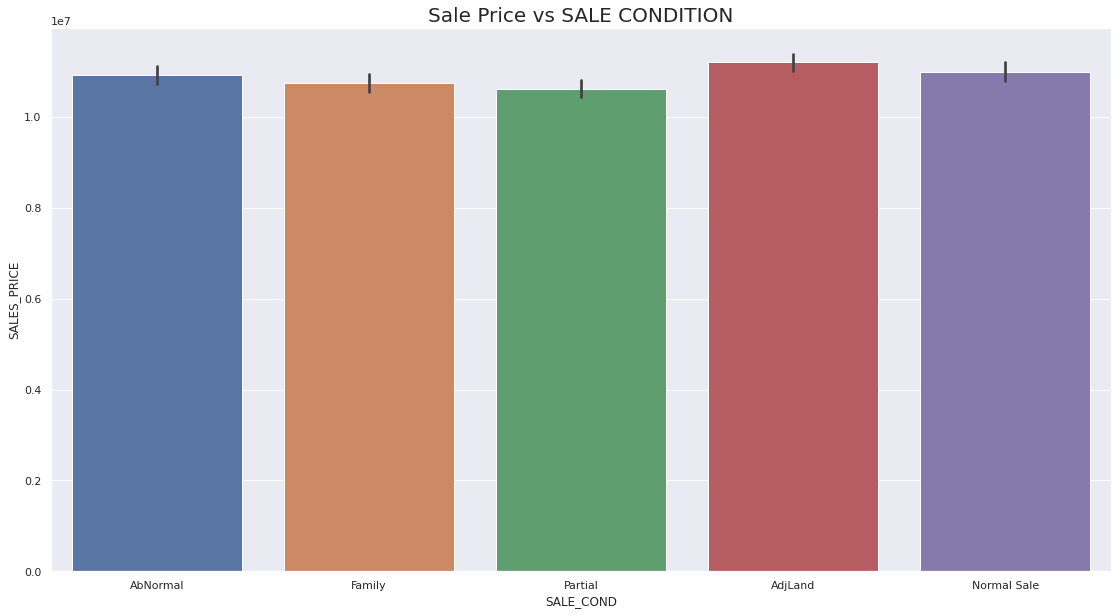

In [ ]:
sns.set(rc = {'figure.figsize' : (19,10)})
sns.barplot(x= "SALE_COND", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs SALE CONDITION', fontsize=20)
mlt.show()

In [ ]:
#PARKING FACILITY VS SALE PRICE

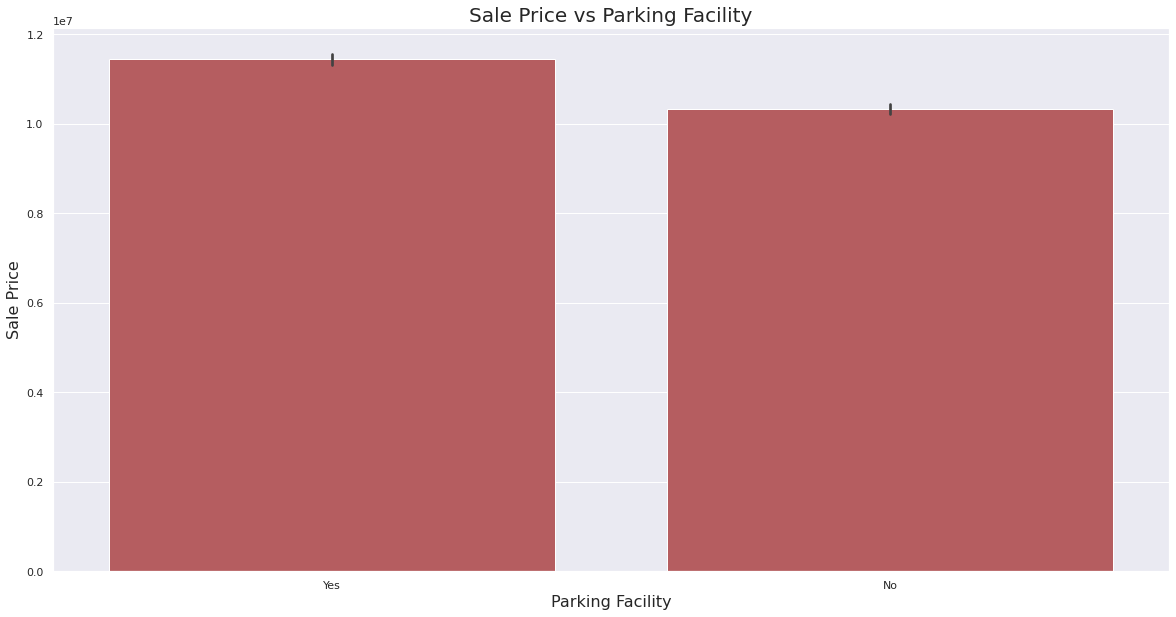

In [ ]:
sns.set(rc = {'figure.figsize' : (20,10)})
sns.barplot(x= "PARK_FACIL", y = "SALES_PRICE", data = sale, color='r')
mlt.xlabel('Parking Facility', fontsize=16)
mlt.ylabel('Sale Price', fontsize=16)
mlt.title('Sale Price vs Parking Facility', fontsize=20)
mlt.show()

In [ ]:
#DATE BUILD VS SALE PRICE BY BUILDING TYPE

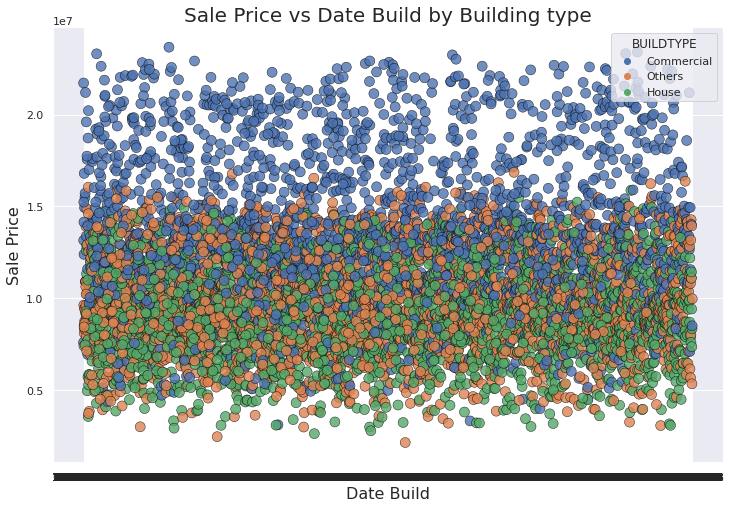

In [ ]:
sns.set(rc = {'figure.figsize' : (12,8)})
sns.scatterplot(x="DATE_BUILD", y="SALES_PRICE", hue='BUILDTYPE', data=sale, s=100, alpha=0.8, edgecolor='black', linewidth=0.5)
mlt.xlabel('Date Build', fontsize=16)
mlt.ylabel('Sale Price', fontsize=16)
mlt.title('Sale Price vs Date Build by Building type', fontsize=20)
mlt.show()

In [ ]:
#BUILDING TYPE VS SALE PRICE

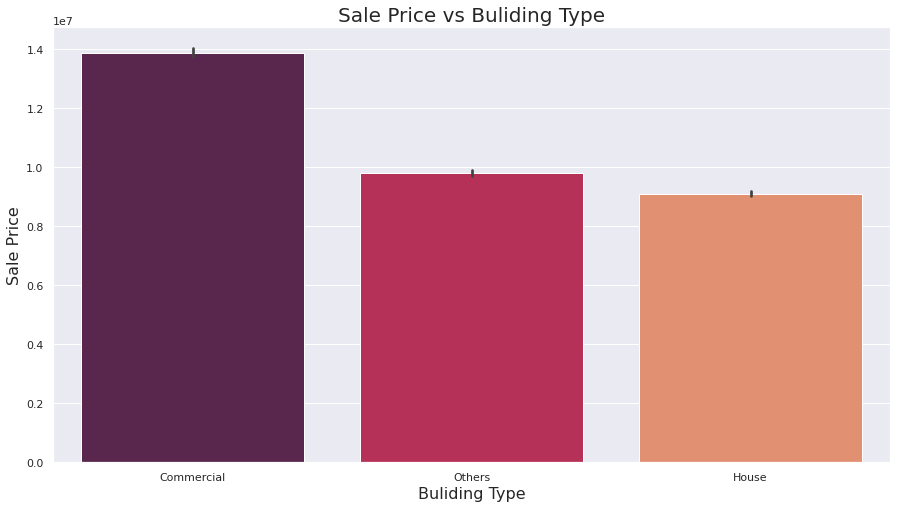

In [ ]:
mlt.figure(figsize=(15,8))
sns.barplot(x= "BUILDTYPE", y = "SALES_PRICE", data = sale, palette='rocket')
mlt.xlabel('Buliding Type', fontsize=16)
mlt.ylabel('Sale Price', fontsize=16)
mlt.title('Sale Price vs Buliding Type', fontsize=20)
mlt.show()

In [ ]:
#UTILITY AVAILABLE VS SALE PRICE

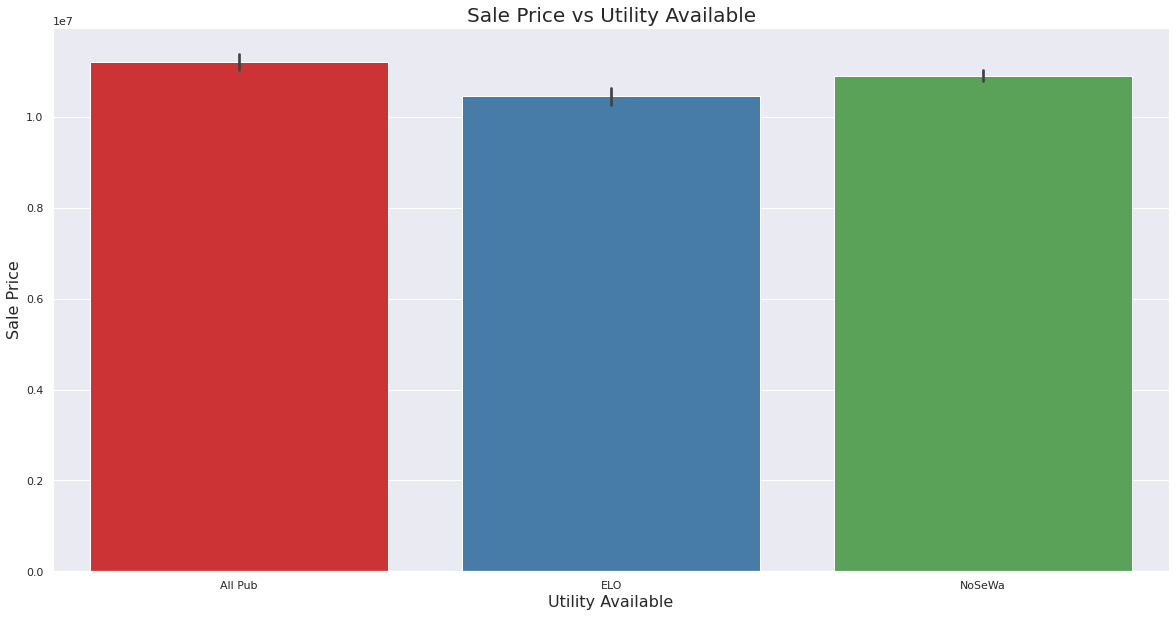

In [ ]:
sns.set(rc = {'figure.figsize' : (20,10)})
sns.barplot(x= "UTILITY_AVAIL", y = "SALES_PRICE", data = sale, palette='Set1')
mlt.xlabel('Utility Available', fontsize=16)
mlt.ylabel('Sale Price', fontsize=16)
mlt.title('Sale Price vs Utility Available', fontsize=20)
mlt.show()

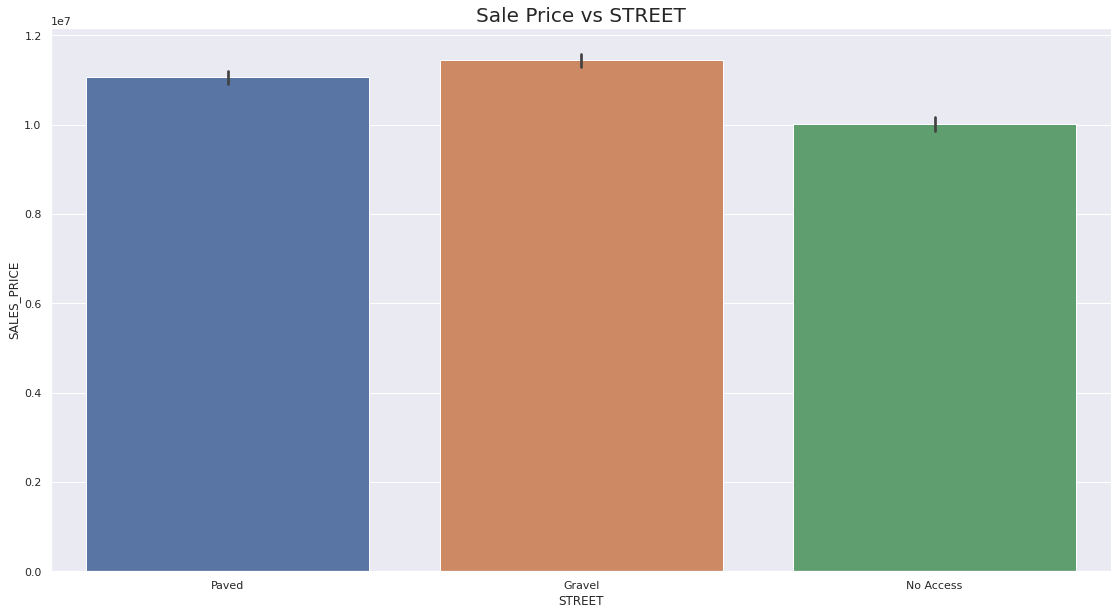

In [ ]:
## Salesprice VS STREET
sns.set(rc = {'figure.figsize' : (19,10)})
sns.barplot(x= "STREET", y = "SALES_PRICE", data = sale)
mlt.title('Sale Price vs STREET', fontsize=20)
mlt.show()

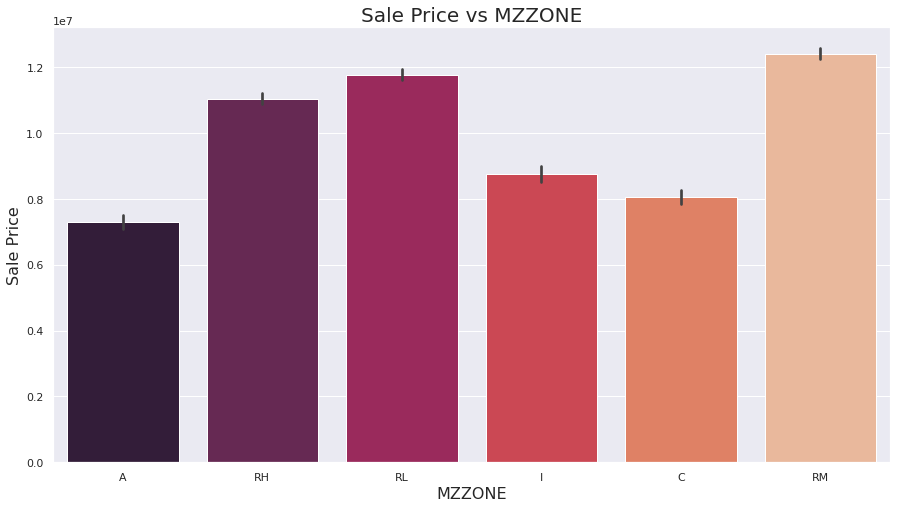

In [ ]:
## Salesprice VS MZZONE
mlt.figure(figsize=(15,8))
sns.barplot(x= "MZZONE", y = "SALES_PRICE", data = sale, palette='rocket')
mlt.xlabel('MZZONE', fontsize=16)
mlt.ylabel('Sale Price', fontsize=16)
mlt.title('Sale Price vs MZZONE', fontsize=20)
mlt.show()

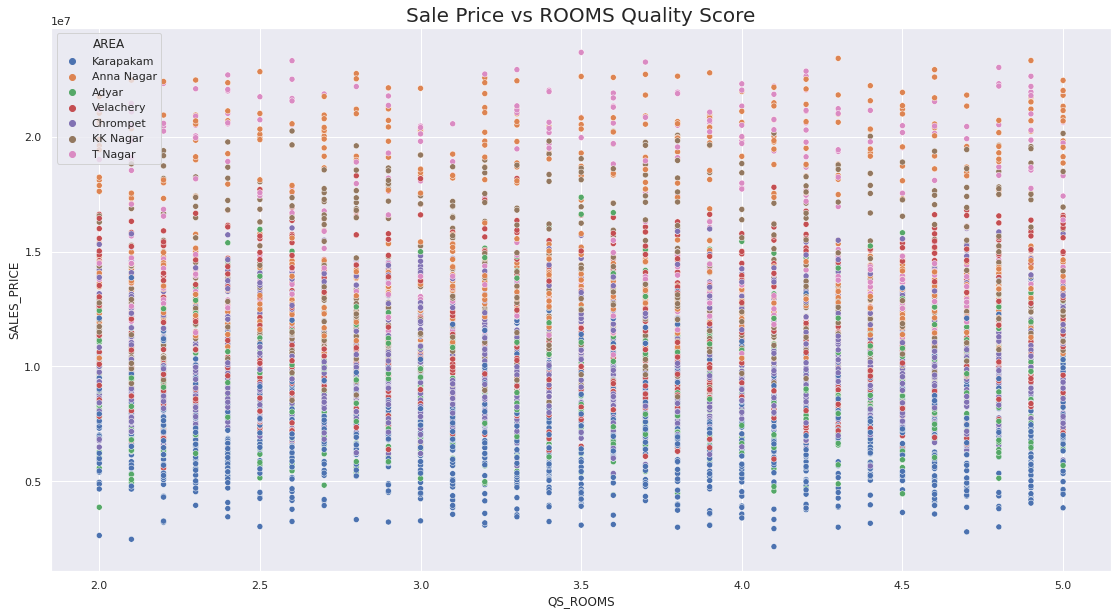

In [ ]:
## Salesprice VS ROOMS Quality Score
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(x= "QS_ROOMS", y = "SALES_PRICE",hue="AREA", data = sale)
mlt.title('Sale Price vs ROOMS Quality Score', fontsize=20)
mlt.show()

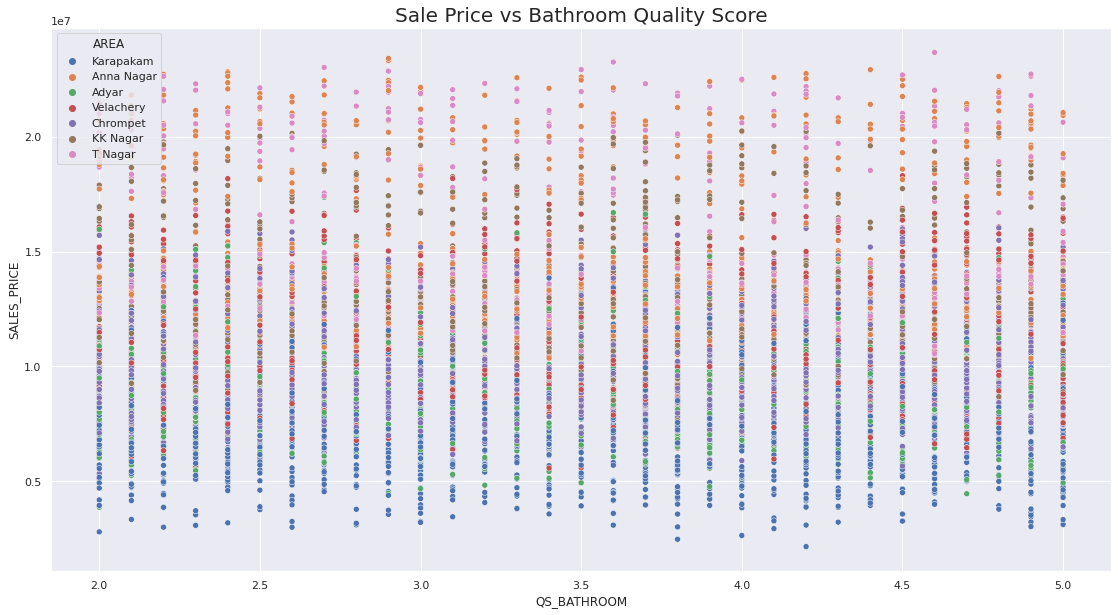

In [ ]:
## Salesprice VS Bathroom Quality Score
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(x= "QS_BATHROOM", y = "SALES_PRICE",hue="AREA", data = sale)
mlt.title('Sale Price vs Bathroom Quality Score', fontsize=20)
mlt.show()

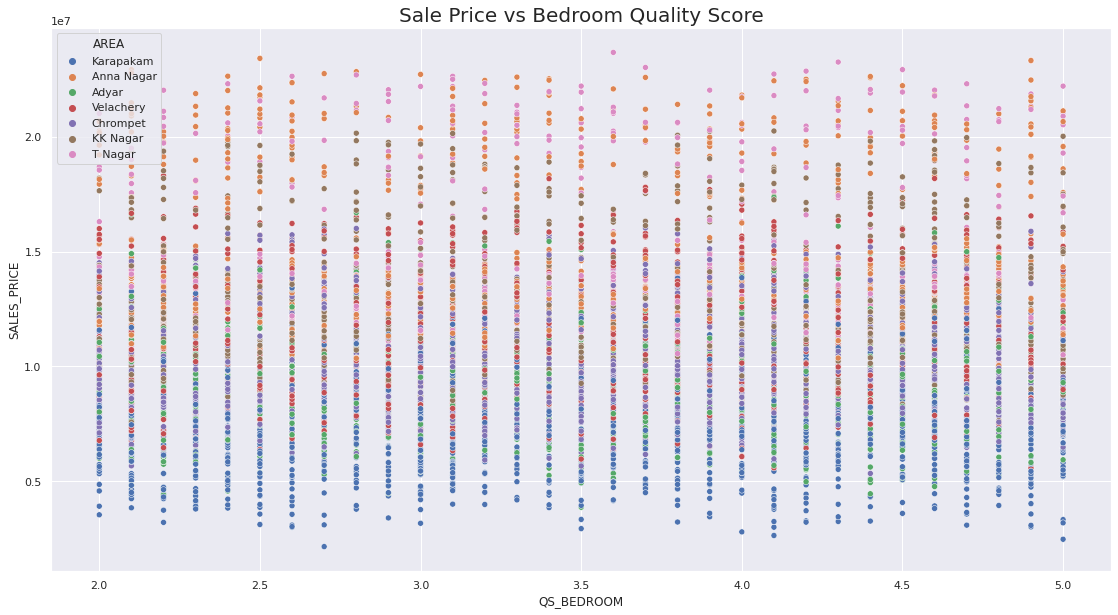

In [ ]:
## Salesprice VS Bedroom Quality Score
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(x= "QS_BEDROOM", y = "SALES_PRICE",hue="AREA", data = sale)
mlt.title('Sale Price vs Bedroom Quality Score', fontsize=20)
mlt.show()

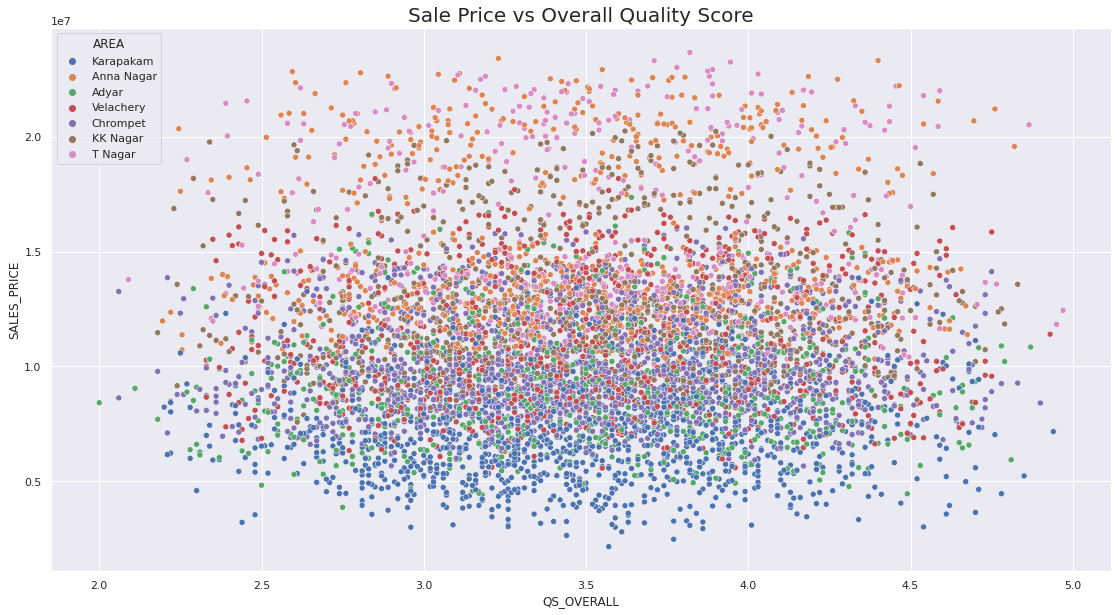

In [ ]:
## Salesprice VS Overall Quality Score
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(x= "QS_OVERALL", y = "SALES_PRICE",hue="AREA", data = sale)
mlt.title('Sale Price vs Overall Quality Score', fontsize=20)
mlt.show()

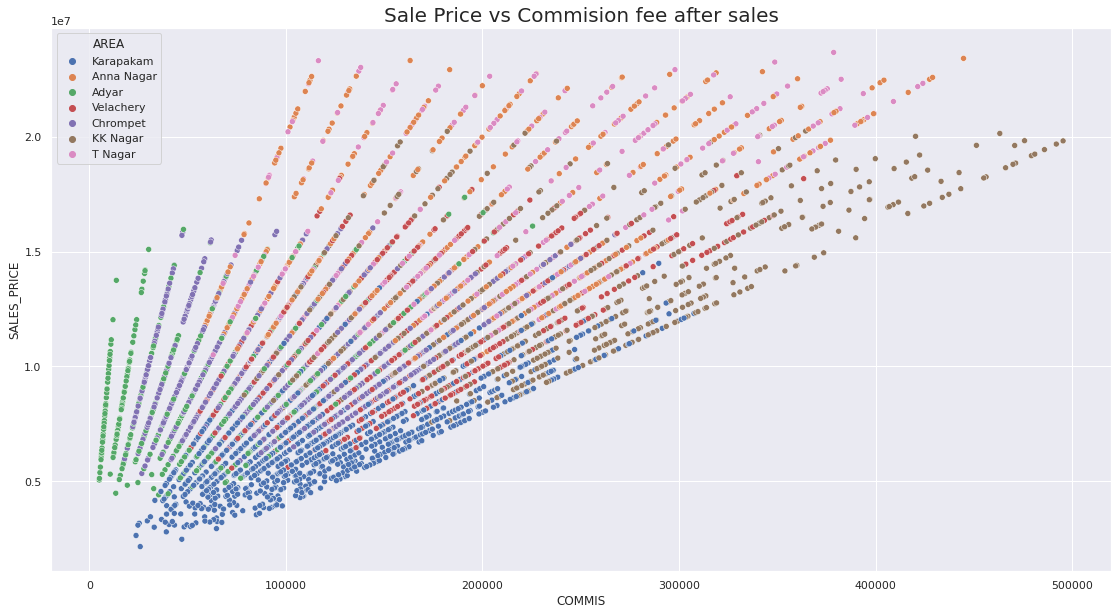

In [ ]:
## Salesprice VS Commision fee after sales
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(x= "COMMIS", y = "SALES_PRICE",hue="AREA",data = sale)
mlt.title('Sale Price vs Commision fee after sales', fontsize=20)
mlt.show()

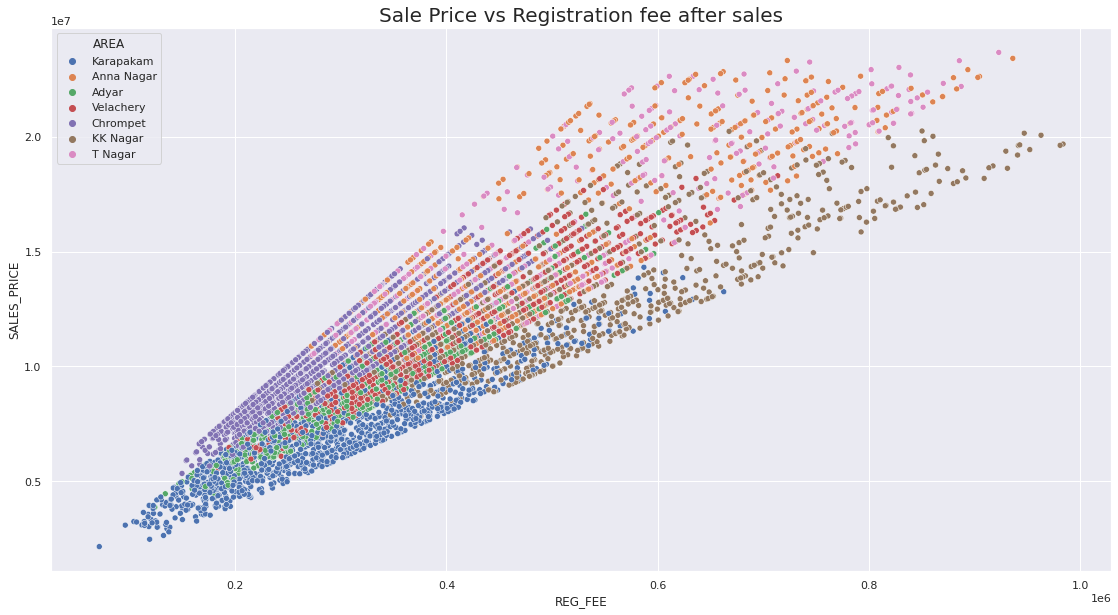

In [ ]:
## Salesprice VS Registration fee after sales
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(x= "REG_FEE", y = "SALES_PRICE",hue="AREA", data = sale)
mlt.title('Sale Price vs Registration fee after sales', fontsize=20)
mlt.show()

In [ ]:
# Building Age vs Sales Price
import datetime

# convert the DATE_SALE and DATE_BUILD columns to datetime variables
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')

In [ ]:
# calculate the building age in years and add a new column to the dataframe
df['BUILDING_AGE'] = (datetime.datetime.now() - df['DATE_BUILD']) / datetime.timedelta(days=365)

In [ ]:
# print the first 5 rows of the dataframe to check the results
df.head()

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210   Karapakam      1004 2011-05-04            131        1.0   
1  P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2  P01812       Adyar       909 2012-02-04             70        1.0   
3  P05346   Velachery      1855 2010-03-13             14        3.0   
4  P06210   Karapakam      1226 2009-10-05             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ...  STREET MZZONE QS_ROOMS  \
0         1.0       3  AbNormal        Yes  ...   Paved      A      4.0   
1         1.0       5  AbNormal         No  ...  Gravel     RH      4.9   
2         1.0       3  AbNormal        Yes  ...  Gravel     RL      4.1   
3         2.0       5    Family         No  ...   Paved      I      4.7   
4         1.0       3  AbNormal        Yes  ...  Gravel      C      3.0   

  QS_BATHROOM QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0         3.9        4.9       4.330   380000  144400      7600000   
1         4.2        2.5       3.765   760122  304049     21717770   
2         3.8        2.2       3.090   421094   92114     13159200   
3         3.9        3.6       4.010   356321   77042      9630290   
4         2.5        4.1       3.290   237000   74063      7406250   

   BUILDING_AGE  
0     55.889504  
1     27.264847  
2     31.133340  
3     35.031970  
4     43.467587  

[5 rows x 23 columns]

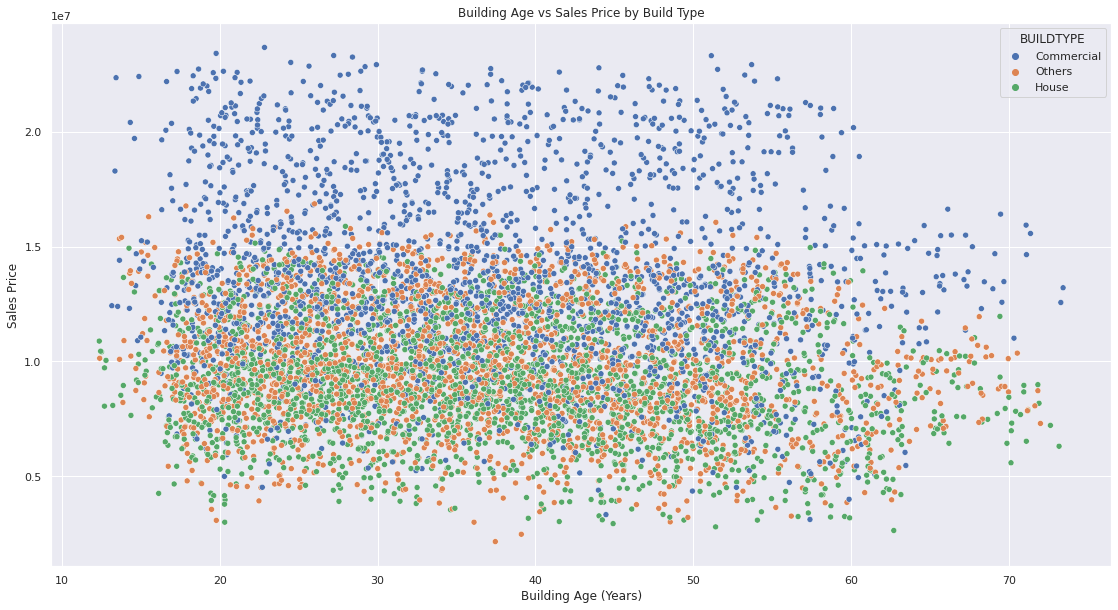

In [ ]:
#Plotting the Relationship between Building Age and Sales Price
sns.set(rc = {'figure.figsize' : (19,10)})
sns.scatterplot(data=df, x='BUILDING_AGE', y='SALES_PRICE', hue='BUILDTYPE')
mlt.xlabel('Building Age (Years)')
mlt.ylabel('Sales Price')
mlt.title('Building Age vs Sales Price by Build Type')
mlt.show()

In [ ]:
# Sales price decreases when the age of the building is more than 60years.
# Sales price is high during the period of 20-50 Years.
# Sales price is identified higher for commercial buildings.

In [ ]:
# DATA PREPROCESSING

In [ ]:
#NaN Handling

In [ ]:
# Replacing the Null Values with median values of the data using Simple Imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median',fill_value=None)
df['N_BEDROOM']=imputer.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM']=imputer.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL']=imputer.fit_transform(df[['QS_OVERALL']])

In [ ]:
#Changing the datatype from float to int
df.QS_ROOMS=df.QS_ROOMS.astype(int)
df.QS_BATHROOM=df.QS_BATHROOM.astype(int)
df.QS_BEDROOM=df.QS_BEDROOM.astype(int)
df.QS_OVERALL=df.QS_OVERALL.astype(int)
df.N_BEDROOM=df.N_BEDROOM.astype(int)
df.N_BATHROOM=df.N_BATHROOM.astype(int)

In [ ]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
BUILDING_AGE     0
dtype: int64

<Axes: >

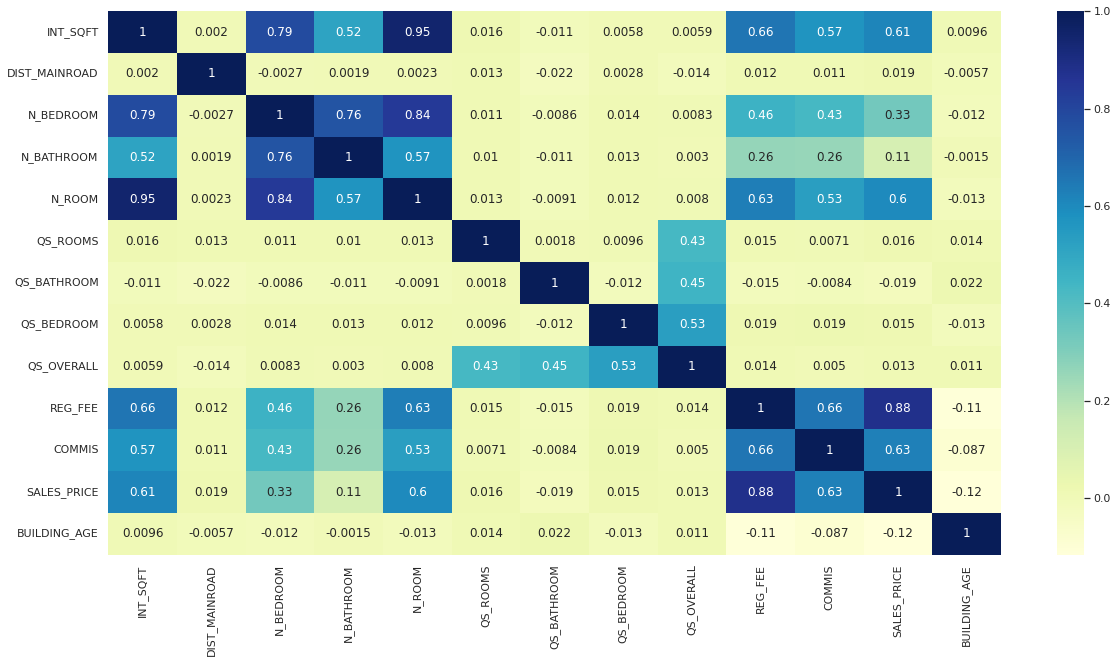

In [ ]:
corr_matrix=df.corr()
mlt.subplots(figsize = (20,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [ ]:
#Handling Outliers

<Axes: >

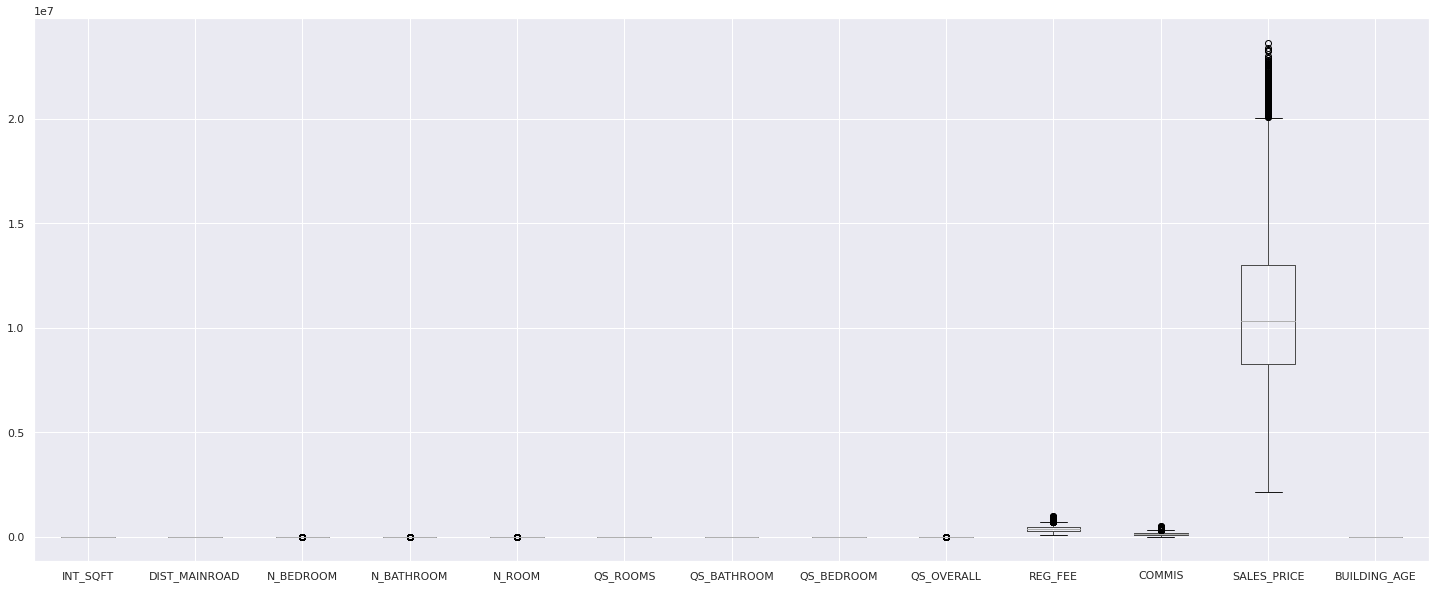

In [ ]:
mlt.figure(figsize=(25,10))
df.boxplot()

In [ ]:
for i in ['N_BEDROOM','N_BATHROOM','N_ROOM','QS_OVERALL']:
    print(i)
    Q1=np.percentile(df[i],25,interpolation='midpoint')
    Q2=np.percentile(df[i],50,interpolation='midpoint')
    Q3=np.percentile(df[i],75,interpolation='midpoint')
    print(Q1, Q2, Q3)

    IQR=Q3-Q1
    print(IQR)   

    low_limit=Q1-1.5*IQR
    upp_limit=Q3+1.5*IQR
    print('LOWER LIMIT = ',low_limit)
    print('UPPER LIMIT = ',upp_limit)

    drop_index = df[(df[i] < low_limit) | (df[i] > upp_limit)].index
    df.drop(drop_index,inplace=True)
df 

N_BEDROOM
1.0 1.0 2.0
1.0
LOWER LIMIT =  -0.5
UPPER LIMIT =  3.5
N_BATHROOM
1.0 1.0 1.0
0.0
LOWER LIMIT =  1.0
UPPER LIMIT =  1.0
N_ROOM
3.0 3.0 4.0
1.0
LOWER LIMIT =  1.5
UPPER LIMIT =  5.5
QS_OVERALL
3.0 3.0 3.0
0.0
LOWER LIMIT =  3.0
UPPER LIMIT =  3.0


<ipython-input-72-57cc945cba12>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df[i],25,interpolation='midpoint')
<ipython-input-72-57cc945cba12>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df[i],50,interpolation='midpoint')
<ipython-input-72-57cc945cba12>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(df[i],75,interpolatio

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
1     P09411  Anna Nagar      1986 2006-12-19             26          2   
2     P01812       Adyar       909 2012-02-04             70          1   
4     P06210   Karapakam      1226 2009-10-05             84          1   
5     P00219    Chrompet      1220 2014-09-11             36          2   
8     P03377    Chrompet       771 2011-04-06            175          1   
...      ...         ...       ...        ...            ...        ...   
7096  P03146    Chrompet      1275 2011-05-18              3          2   
7097  P05670  Anna Nagar      1860 2010-01-15            174          2   
7098  P00629  Anna Nagar      1611 2013-11-21            144          1   
7101  P05042   Karapakam       666 2010-05-11             51          1   
7106  P09594   Velachery      1614 2006-08-25            152          2   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ...     STREET MZZONE  \
1              1       5     AbNormal         No  ...     Gravel     RH   
2              1       3     AbNormal        Yes  ...     Gravel     RL   
4              1       3     AbNormal        Yes  ...     Gravel      C   
5              1       4      Partial         No  ...  No Access     RH   
8              1       2      AdjLand         No  ...      Paved     RM   
...          ...     ...          ...        ...  ...        ...    ...   
7096           1       4     AbNormal         No  ...     Gravel     RL   
7097           1       5     AbNormal         No  ...     Gravel     RH   
7098           1       4      Partial        Yes  ...      Paved     RM   
7101           1       2      AdjLand        Yes  ...     Gravel      I   
7106           1       4  Normal Sale         No  ...     Gravel      I   

     QS_ROOMS QS_BATHROOM QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
1           4           4          2           3   760122  304049   
2           4           3          2           3   421094   92114   
4           3           2          4           3   237000   74063   
5           4           2          3           3   409027  198316   
8           2           3          4           3   257578   33236   
...       ...         ...        ...         ...      ...     ...   
7096        3           3          4           3   287798   86339   
7097        4           3          3           3   522119   70557   
7098        3           3          2           3   432288  209172   
7101        3           4          2           3   273317   74541   
7106        4           4          2           3   317354  167028   

      SALES_PRICE  BUILDING_AGE  
1        21717770     27.264847  
2        13159200     31.133340  
4         7406250     43.467587  
5        12394750     13.530600  
8         8308970     45.966217  
...           ...           ...  
7096      9593250     34.851148  
7097     14111320     19.188135  
7098     13944780     14.336080  
7101      6211750     48.870326  
7106      8351410     44.582655  

[3556 rows x 23 columns]

<Axes: >

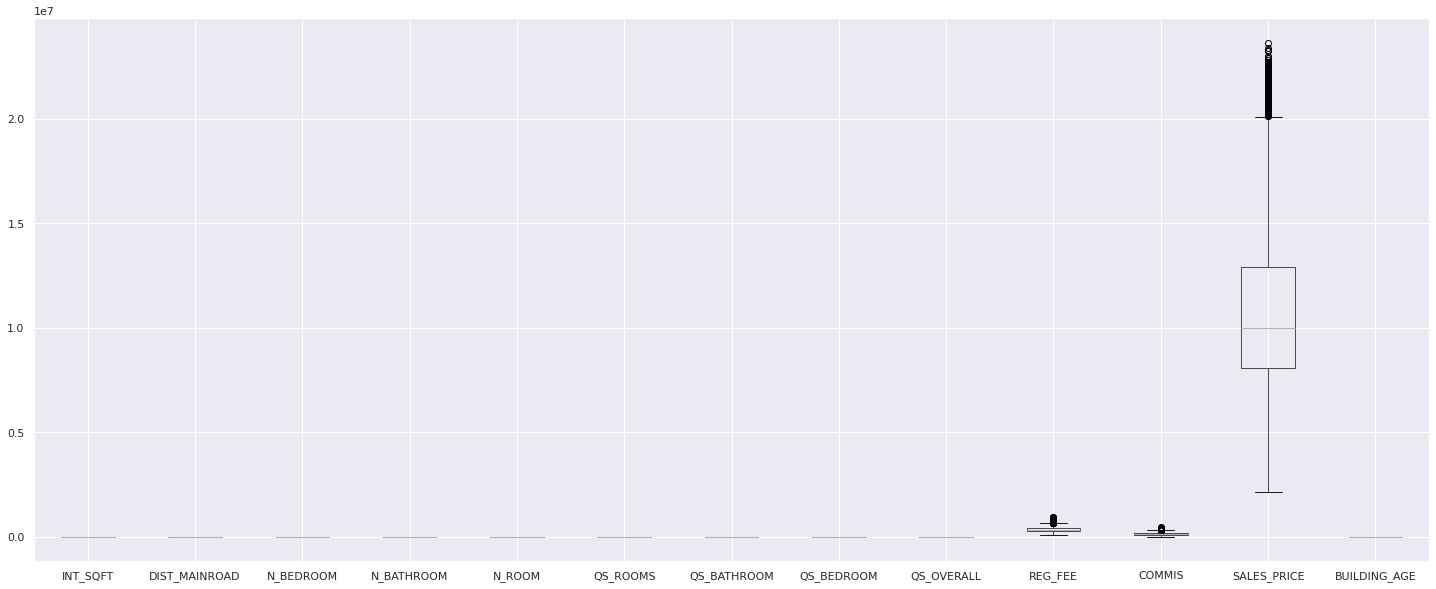

In [ ]:
mlt.figure(figsize=(25,10))
df.boxplot()

<ipython-input-74-0ca593b60d51>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('log_REG_FEE', axis=1, inplace=True)


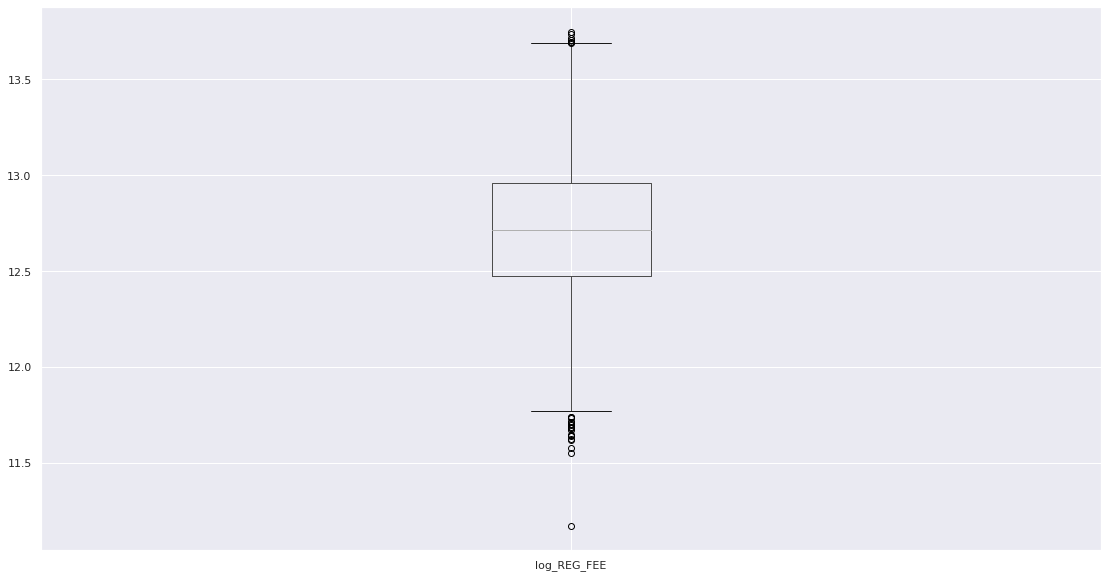

In [ ]:
# Take the logarithm of the target variable 
df['log_REG_FEE'] = np.log(df['REG_FEE'])

# Create a boxplot of the log-transformed 
df.boxplot(column='log_REG_FEE')

# Calculate the upper and lower bounds using the interquartile range
Q1 = df['log_REG_FEE'].quantile(0.25)
Q3 = df['log_REG_FEE'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Filter the dataframe to remove outliers
df = df[(df['log_REG_FEE'] > lower_bound) & (df['log_REG_FEE'] < upper_bound)]

# Remove the log_price column
df.drop('log_REG_FEE', axis=1, inplace=True)


<ipython-input-75-d90599c46751>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_COMMIS'] = np.log(df['COMMIS'])
<ipython-input-75-d90599c46751>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('log_COMMIS', axis=1, inplace=True)


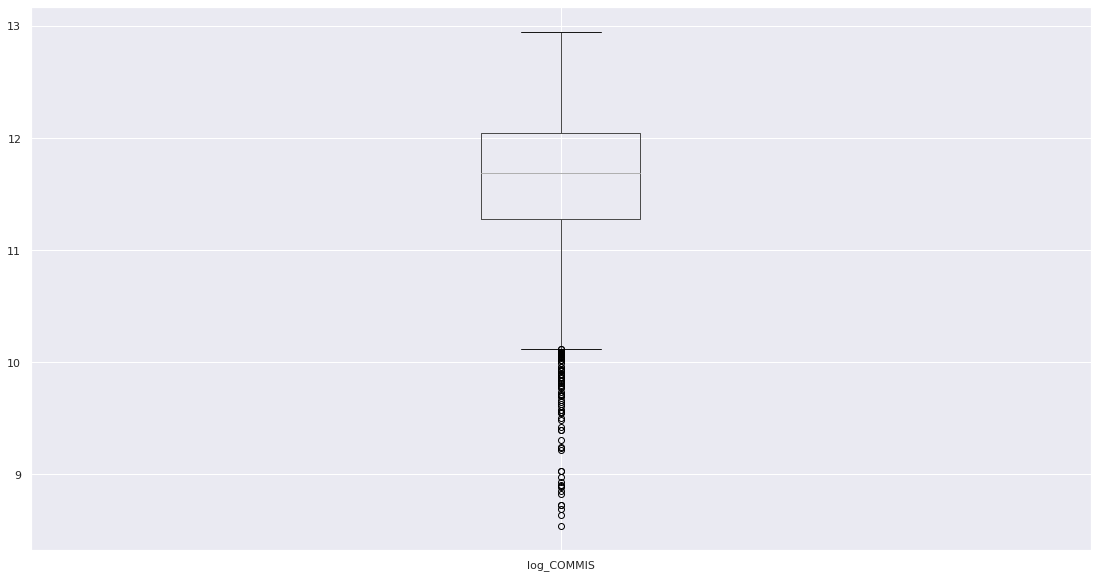

In [ ]:
# Take the logarithm of the target variable
df['log_COMMIS'] = np.log(df['COMMIS'])

# Create a boxplot of the log-transformed 
df.boxplot(column='log_COMMIS')

# Calculate the upper and lower bounds using the interquartile range
Q1 = df['log_COMMIS'].quantile(0.25)
Q3 = df['log_COMMIS'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR


# Filter the dataframe to remove outliers
df = df[(df['log_COMMIS'] > lower_bound) & (df['log_COMMIS'] < upper_bound)]

# Remove the log_price column
df.drop('log_COMMIS', axis=1, inplace=True)


In [ ]:
#FEATURE REDUCTION

#Dropping unwanted columns
df=df.drop(['DATE_SALE','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','PRT_ID','QS_OVERALL','REG_FEE','COMMIS'],axis=1)
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
1     Anna Nagar      1986             26          2           1       5   
2          Adyar       909             70          1           1       3   
4      Karapakam      1226             84          1           1       3   
5       Chrompet      1220             36          2           1       4   
8       Chrompet       771            175          1           1       2   
...          ...       ...            ...        ...         ...     ...   
7096    Chrompet      1275              3          2           1       4   
7097  Anna Nagar      1860            174          2           1       5   
7098  Anna Nagar      1611            144          1           1       4   
7101   Karapakam       666             51          1           1       2   
7106   Velachery      1614            152          2           1       4   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
1        AbNormal         No  Commercial       All Pub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
4        AbNormal        Yes      Others       All Pub     Gravel      C   
5         Partial         No  Commercial        NoSeWa  No Access     RH   
8         AdjLand         No      Others        NoSeWa      Paved     RM   
...           ...        ...         ...           ...        ...    ...   
7096     AbNormal         No       House           ELO     Gravel     RL   
7097     AbNormal         No      Others       All Pub     Gravel     RH   
7098      Partial        Yes      Others        NoSeWa      Paved     RM   
7101      AdjLand        Yes      Others           ELO     Gravel      I   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   

      SALES_PRICE  BUILDING_AGE  
1        21717770     27.264847  
2        13159200     31.133340  
4         7406250     43.467587  
5        12394750     13.530600  
8         8308970     45.966217  
...           ...           ...  
7096      9593250     34.851148  
7097     14111320     19.188135  
7098     13944780     14.336080  
7101      6211750     48.870326  
7106      8351410     44.582655  

[3448 rows x 14 columns]

<Axes: >

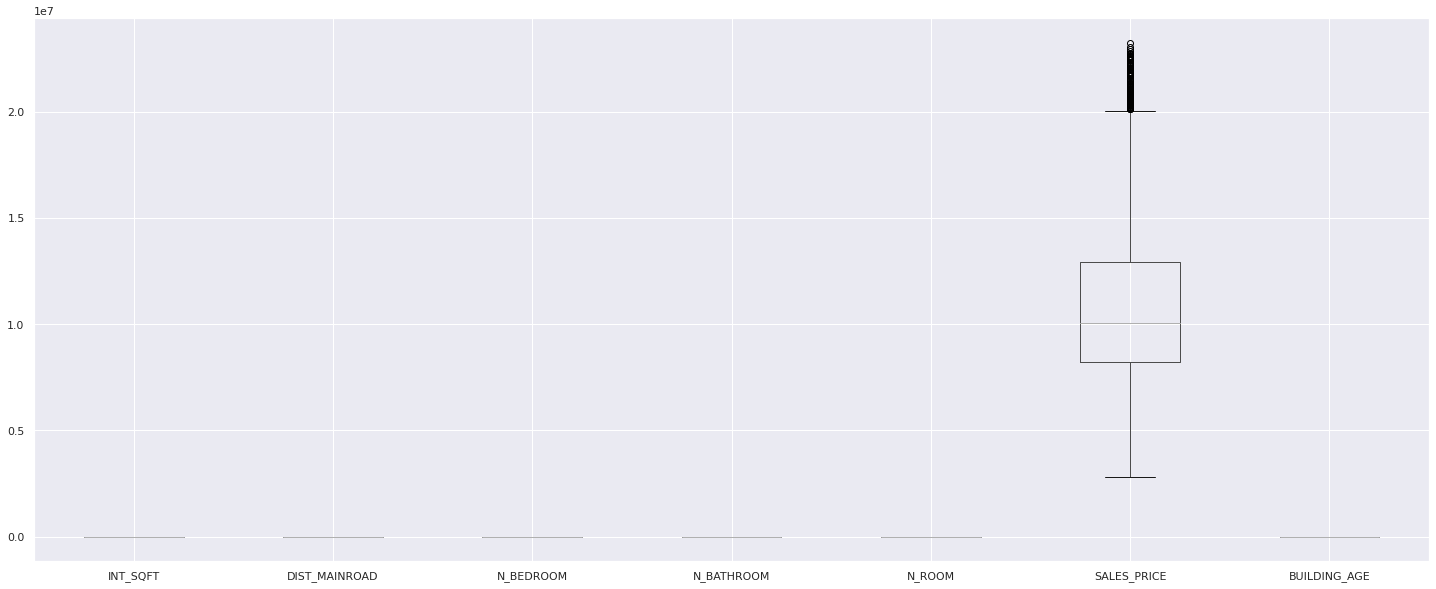

In [ ]:
mlt.figure(figsize=(25,10))
df.boxplot()

In [ ]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
1     1      1986             26          2           1       5          0   
2     0       909             70          1           1       3          0   
4     4      1226             84          1           1       3          0   
5     2      1220             36          2           1       4          4   
8     2       771            175          1           1       2          1   

   PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  \
1           0          0              0       0       3     21717770   
2           1          0              1       0       4     13159200   
4           1          2              0       0       1      7406250   
5           0          0              2       1       3     12394750   
8           0          2              2       2       5      8308970   

   BUILDING_AGE  
1     27.264847  
2     31.133340  
4     43.467587  
5     13.530600  
8     45.966217

In [ ]:
# FEATURE SCALING

In [ ]:
x= df.drop('SALES_PRICE',axis=1)                    # taking SALES_PRICE as target column
y= df['SALES_PRICE']

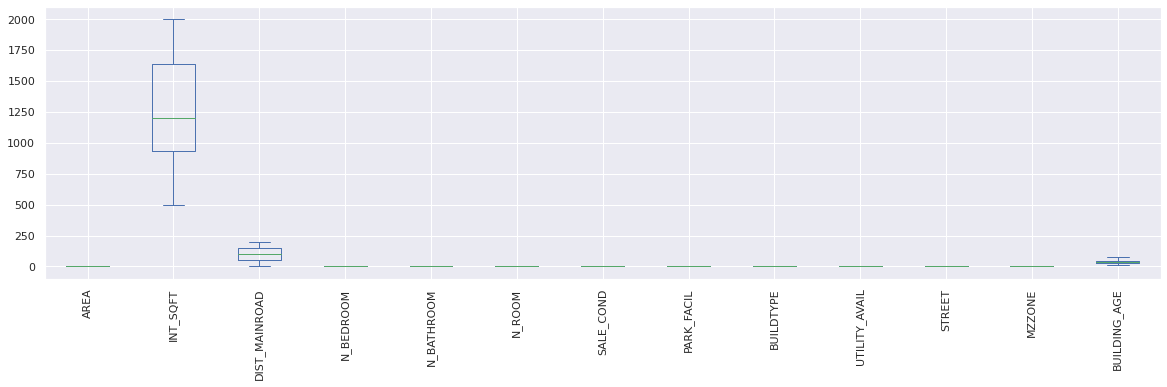

In [ ]:
# Splitting and training our cleaned dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
mlt.show()

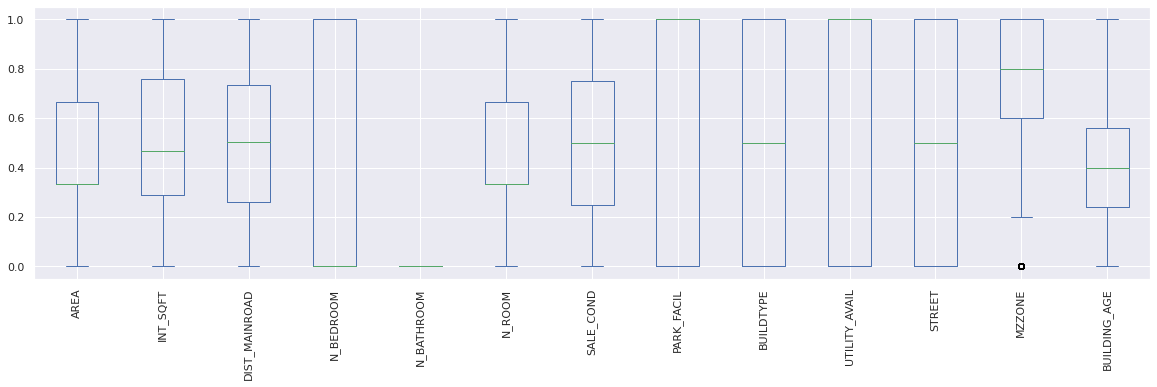

In [ ]:
# performing MinMax scaling
mms = MinMaxScaler().fit(X_train)
X_train_mm = mms.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mms.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
mlt.show()

In [ ]:
# Model Selection

In [ ]:
#Linear Regression Model

In [ ]:
## create an instance of the class LinearRegression, which will represent the regression model:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
r_sq = lr_model.score(X_train,y_train)

print('coefficient of determination:', r_sq)
print('\nintercept:', lr_model.intercept_)
print('\nslope:', lr_model.coef_)

y_pred = lr_model.predict(X_test)

from math import sqrt

print("\nMAE = ", mean_absolute_error(y_test,y_pred))
print("\nMSE = ", mean_squared_error(y_test,y_pred))
print("\nR2 Value = ", r2_score(y_test,y_pred))
print("\nAdjusted R2 = ", 1 - (1-lr_model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

coefficient of determination: 0.8017796157054885

intercept: 2916678.3359771622

slope: [-2.82047521e+05  4.63270826e+03  6.15550414e+02 -1.31945286e+06
  6.98491931e-10  1.37609203e+06 -9.49195830e+04  1.07111053e+06
 -1.91577397e+06 -1.35523747e+05 -2.67147973e+05  7.06092376e+05
 -1.86875112e+04]

MAE =  1409461.9674386107

MSE =  3055620071174.933

R2 Value =  0.7830671085758611

Adjusted R2 =  0.7973613617459443


In [ ]:
# Decision tree Regression model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,dt_pred))

print("MAE = ", mean_absolute_error(y_test,dt_pred))
print("MSE = ", mean_squared_error(y_test,dt_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,dt_pred))

MAE =  557376.268115942
MSE =  488371212803.2246
RMSE =  698835.6121458212
R2 Value =  0.9653282224838313


In [ ]:
# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,rf_pred))

print("MAE = ", mean_absolute_error(y_test,rf_pred))
print("MSE = ", mean_squared_error(y_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,rf_pred))

MAE =  425406.10014492756
MSE =  293793968997.2924
RMSE =  542027.6459713954
R2 Value =  0.9791421794290512


In [ ]:
# From the above model since R2 value for Random Forest Regression Model is closer to 1 it is taken as the best model.